<a href="https://colab.research.google.com/github/chiss7/breast-cancer-tensorflow/blob/main/BC1/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp '/content/drive/MyDrive/Colab Notebooks/Cancer de pecho - Tensorflow 2 (no keras)/utils.py' '/content'
!cp '/content/drive/MyDrive/Colab Notebooks/Cancer de pecho - Tensorflow 2 (no keras)/optimizers.py' '/content'

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from utils import Model
from optimizers import GradientDescent, Momentum, Adam

# Refreshing import to changes in utils.py
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
cancer_de_pecho = load_breast_cancer()
X = cancer_de_pecho["data"]
y = cancer_de_pecho["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

df_train = pd.DataFrame(X_train, columns=cancer_de_pecho["feature_names"])

In [ ]:
X_train = np.transpose(np.array(X_train, dtype=np.float32))
X_test = np.transpose(np.array(X_test, dtype=np.float32))
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [ ]:
df_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,12.540,16.32,81.25,476.3,0.11580,0.10850,0.05928,0.03279,0.1943,0.06612,...,13.570,21.40,86.67,552.0,0.1580,0.1751,0.18890,0.08411,0.3155,0.07538
1,13.610,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,0.05871,...,16.990,35.27,108.60,906.5,0.1265,0.1943,0.31690,0.11840,0.2651,0.07397
2,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.18780,0.1800,0.05770,...,33.120,32.85,220.80,3216.0,0.1472,0.4034,0.53400,0.26880,0.2856,0.08082
3,11.410,14.92,73.53,402.0,0.09059,0.08155,0.06181,0.02361,0.1167,0.06217,...,12.370,17.70,79.12,467.2,0.1121,0.1610,0.16480,0.06296,0.1811,0.07427
4,15.100,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.08534,0.2001,0.06467,...,16.110,18.33,105.90,762.6,0.1386,0.2883,0.19600,0.14230,0.2590,0.07779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.01504,0.1717,0.06899,...,10.410,31.56,67.03,330.7,0.1548,0.1664,0.09412,0.06517,0.2878,0.09211
422,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,0.05718,...,15.150,31.82,99.00,698.8,0.1162,0.1711,0.22820,0.12820,0.2871,0.06917
423,12.270,17.92,78.41,466.1,0.08685,0.06526,0.03211,0.02653,0.1966,0.05597,...,14.100,28.88,89.00,610.2,0.1240,0.1795,0.13770,0.09532,0.3455,0.06896
424,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.01364,0.2037,0.07751,...,8.678,31.89,54.49,223.6,0.1596,0.3064,0.33930,0.05000,0.2790,0.10660


In [ ]:
# Data Normalization
# used in machine learning to scale the features of a dataset to a specified range. (0 - 1)
# It is particularly useful for binary classification problems.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
# HYPER PARAMETERS
lr = 1e-3
arch = [30, 15]
num_epochs = 1000

model = Model(arch)
optimizer = Adam(learning_rate=lr)
bin_cross_entropy = tf.keras.losses.BinaryCrossentropy()

loss_list = []
accuracy_list = []
val_loss_list = []
val_accuracy_list = []

print("----------------------------------------")
print(model.title)
print(optimizer.title)
print("----------------------------------------")

# TRAIN MODEL
for epoch in range(num_epochs):
  # Gradients
  with tf.GradientTape() as t:
    # Loss
    #loss = model.compute_loss(model(X_train), y_train)
    loss = bin_cross_entropy(y_train, model(X_train))
    val_loss = bin_cross_entropy(y_test, model(X_test))

  grads = t.gradient(loss, model.Variables)

  loss_list.append(loss)
  val_loss_list.append(val_loss)

  # Apply Gradients (optimizer)
  model.Variables = optimizer.apply_gradients(model.Variables, grads)

  # Accuracy
  accuracy = model.compute_accuracy(model(X_train), y_train)
  accuracy_list.append(accuracy)

  val_accuracy = model.compute_accuracy(model(X_test), y_test)
  val_accuracy_list.append(val_accuracy)

  if (epoch % (num_epochs // 10) == 0):
    # Show Accuracy and Loss
    print(f"Epoch: {epoch}, Loss: {loss:.4f}, Val Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}, Val Accuracy: {val_accuracy:.2f}")

#print(model(X_train))

----------------------------------------
Model architecture -> input[30], hidden[30, 15], output[1]
Adam: learning rate = 0.001
----------------------------------------
Epoch: 0, Loss: 1.6217, Val Loss: 1.5582, Accuracy: 0.63, Val Accuracy: 0.62
Epoch: 100, Loss: 0.3850, Val Loss: 0.3896, Accuracy: 0.90, Val Accuracy: 0.90
Epoch: 200, Loss: 0.2764, Val Loss: 0.2887, Accuracy: 0.92, Val Accuracy: 0.94
Epoch: 300, Loss: 0.2376, Val Loss: 0.2462, Accuracy: 0.92, Val Accuracy: 0.94
Epoch: 400, Loss: 0.2194, Val Loss: 0.2224, Accuracy: 0.92, Val Accuracy: 0.94
Epoch: 500, Loss: 0.2096, Val Loss: 0.2077, Accuracy: 0.92, Val Accuracy: 0.94
Epoch: 600, Loss: 0.2036, Val Loss: 0.1979, Accuracy: 0.91, Val Accuracy: 0.94
Epoch: 700, Loss: 0.1996, Val Loss: 0.1910, Accuracy: 0.92, Val Accuracy: 0.94
Epoch: 800, Loss: 0.1965, Val Loss: 0.1861, Accuracy: 0.92, Val Accuracy: 0.94
Epoch: 900, Loss: 0.1940, Val Loss: 0.1823, Accuracy: 0.92, Val Accuracy: 0.94


**Show Loss and Accuracy**


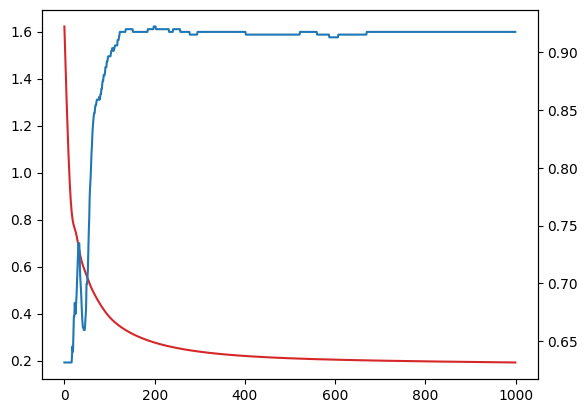

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(loss_list, "tab:red")
ax2 = ax1.twinx()
ax2.plot(accuracy_list, "tab:blue")

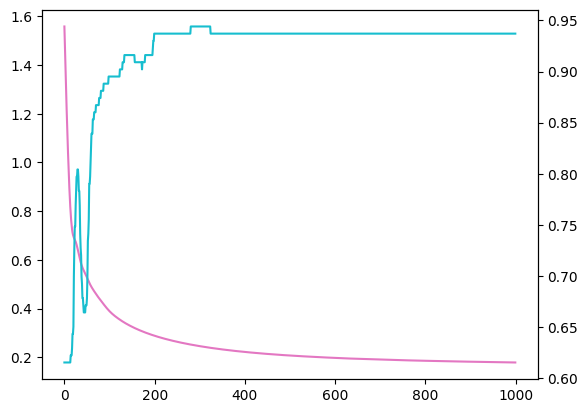

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(val_loss_list, "tab:pink")
ax2 = ax1.twinx()
ax2.plot(val_accuracy_list, "tab:cyan")

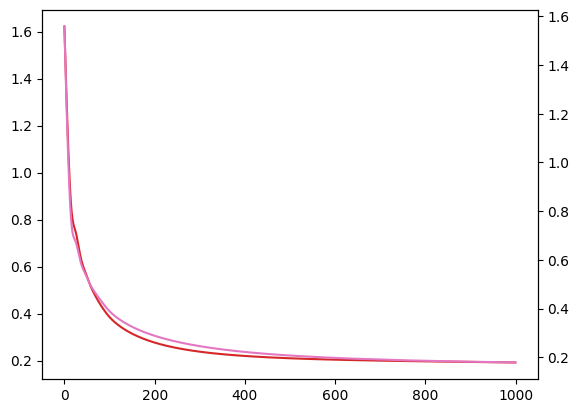

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(loss_list, "tab:red")
ax2 = ax1.twinx()
ax2.plot(val_loss_list, "tab:pink")

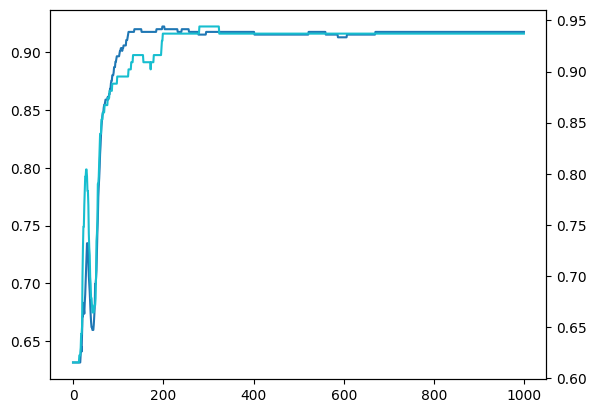

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(accuracy_list, "tab:blue")
ax2 = ax1.twinx()
ax2.plot(val_accuracy_list, "tab:cyan")

**Confusion Matrix**

In [ ]:
VP = 0
VN = 0
FP = 0
FN = 0
y_pred = model(X_test)

for X, y in zip(y_pred[0], y_test):
  if y == 1:
    if tf.equal(tf.round(X).numpy(), y):
      VP += 1
    else:
      FN += 1
  else:
    if tf.equal(tf.round(X).numpy(), y):
      VN += 1
    else:
      FP += 1

T_VP = VP/(VP + FN) * 100
T_VN = VN/(VN + FP) * 100
T_FN = FN/(FN + VP) * 100
T_FP = FP/(FP + VN) * 100

class_names = ['Positive', 'Negative']

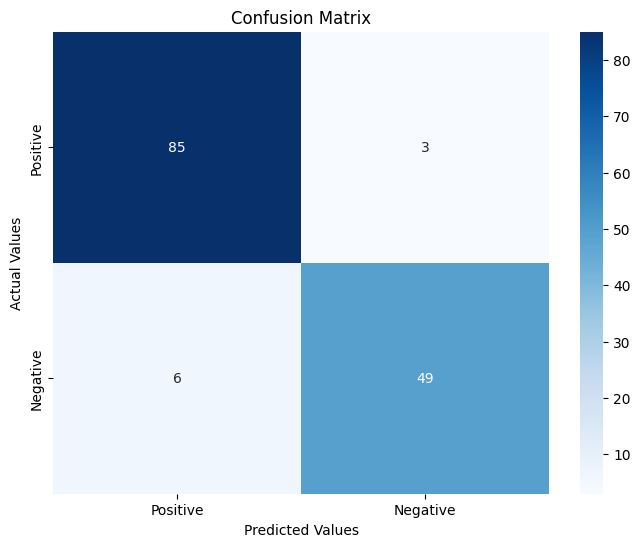

In [ ]:
confusion_matrix = np.array([[VP, FN], [FP, VN]])

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

plt.show()

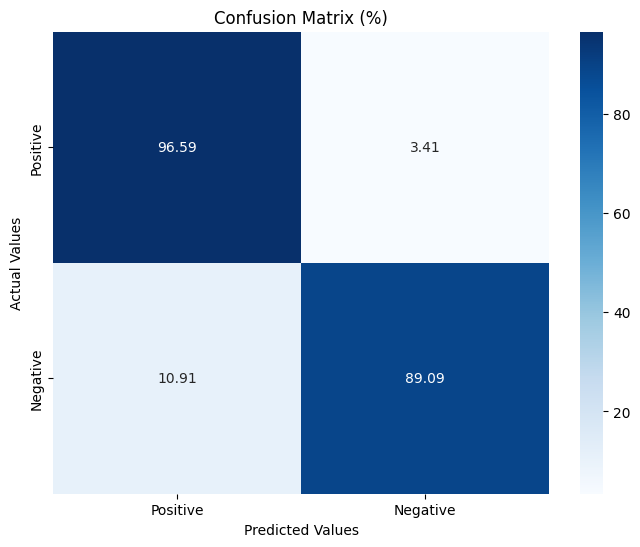

In [ ]:
confusion_matrix = np.array([[T_VP, T_FN], [T_FP, T_VN]])

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix (%)')

plt.show()